In [9]:
import pandas as pd

In [29]:
df = pd.read_csv('C://CUB//sem2//ml//proj//CN_Dataset//cleaned_combined1_job_listings.csv')

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Encode binary variables
binary_columns = ['self-learning capability?', 'worked in teams ever?', 'Introvert']
binary_mapping = {'yes': 1, 'no': 0}
for col in binary_columns:
    print(f'Unique values before mapping in {col}: {df[col].unique()}')
    df[col] = df[col].map(binary_mapping)
    print(f'Unique values after mapping in {col}: {df[col].unique()}')

# Encode ordinal variables
ordinal_columns = ['reading and writing skills', 'memory capability score']
ordinal_mapping = {'poor': 0, 'medium': 1, 'excellent': 2}
for col in ordinal_columns:
    print(f'Unique values before mapping in {col}: {df[col].unique()}')
    df[col] = df[col].map(ordinal_mapping)
    print(f'Unique values after mapping in {col}: {df[col].unique()}')

# Combine all relevant columns for PCA
all_columns = binary_columns + ordinal_columns + ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']
full_data = df[all_columns]


full_data.head()

Unique values before mapping in self-learning capability?: ['yes' 'no']
Unique values after mapping in self-learning capability?: [1 0]
Unique values before mapping in worked in teams ever?: ['yes' 'no']
Unique values after mapping in worked in teams ever?: [1 0]
Unique values before mapping in Introvert: ['no' 'yes']
Unique values after mapping in Introvert: [0 1]
Unique values before mapping in reading and writing skills: ['poor' 'excellent' 'medium']
Unique values after mapping in reading and writing skills: [0 2 1]
Unique values before mapping in memory capability score: ['poor' 'medium' 'excellent']
Unique values after mapping in memory capability score: [0 1 2]


,self-learning capability?,worked in teams ever?,Introvert,reading and writing skills,memory capability score,Logical quotient rating,hackathons,coding skills rating,public speaking points
0,1,1,0,0,0,5,0,6,2
1,0,0,1,2,1,7,6,4,3
2,0,0,0,2,0,2,3,9,1
3,0,1,1,2,0,2,6,3,5
4,1,1,0,2,1,2,0,3,4


In [31]:
# Standardize the full data
scaler = StandardScaler()
full_data_scaled = scaler.fit_transform(full_data)

# Perform PCA on the scaled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(full_data_scaled)
print('Variance explained by 2 components:', pca.explained_variance_ratio_)

# Optionally convert PCA output to DataFrame and display the head for quick inspection
principal_components_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
principal_components_df.head()

Variance explained by 2 components: [0.11951634 0.11676313]


,PC1,PC2
0,-0.628194,-0.366944
1,-0.142336,-0.243729
2,-0.602515,-0.854031
3,0.406462,-2.402476
4,1.086219,-1.561791


In [33]:
pca_3 = PCA(n_components=3)
principal_components_3 = pca_3.fit_transform(full_data_scaled)
print('Variance explained by 3 components:', pca_3.explained_variance_ratio_)

# Convert PCA output for 3 components to DataFrame and display the head
principal_components_df_3 = pd.DataFrame(principal_components_3, columns=['PC1', 'PC2', 'PC3'])
print(principal_components_df_3.head())

Variance explained by 3 components: [0.11951634 0.11676313 0.11538779]
        PC1       PC2       PC3
0 -0.628194 -0.366944 -0.346405
1 -0.142336 -0.243729 -0.308579
2 -0.602515 -0.854031 -2.452611
3  0.406462 -2.402476 -0.248192
4  1.086219 -1.561791  0.583965


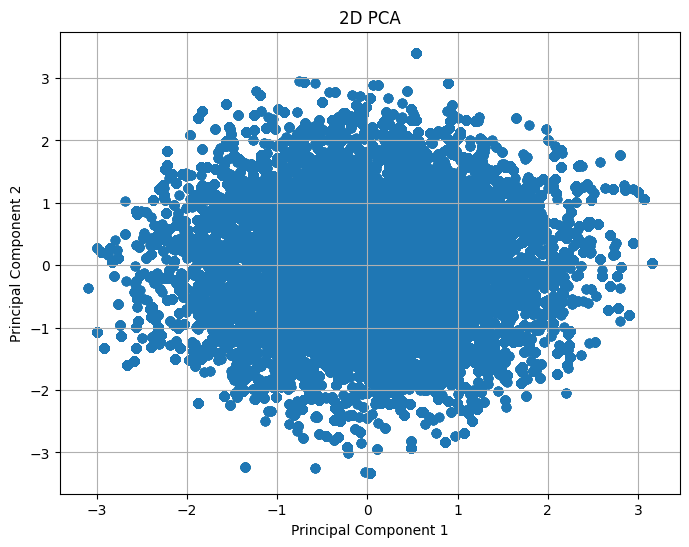

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

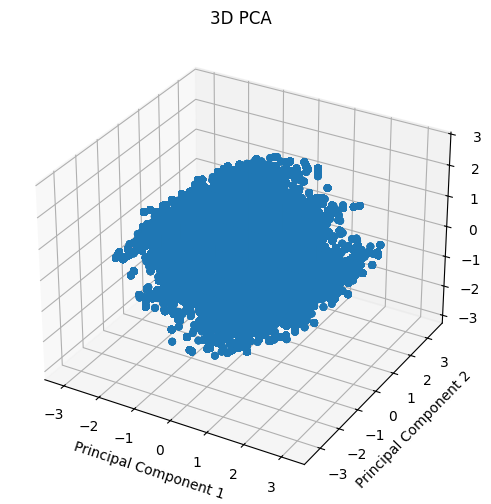

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components_3[:, 0], principal_components_3[:, 1], principal_components_3[:, 2], alpha=0.5)
ax.set_title('3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [37]:
variance_2d = pca.explained_variance_ratio_.sum() * 100
variance_3d = pca_3.explained_variance_ratio_.sum() * 100
print(f"Percentage of variance retained in 2D PCA: {variance_2d:.2f}%")
print(f"Percentage of variance retained in 3D PCA: {variance_3d:.2f}%")


Percentage of variance retained in 2D PCA: 23.63%
Percentage of variance retained in 3D PCA: 35.17%


In [39]:
import numpy as np
pca_full = PCA().fit(full_data_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
n_components_95 = np.where(cumulative_variance >= 95)[0][0] + 1
print(f"Number of components needed to retain at least 95% variance: {n_components_95}")


Number of components needed to retain at least 95% variance: 9


In [40]:
top_three_eigenvalues = pca_full.explained_variance_[:3]
print(f"Top three eigenvalues: {top_three_eigenvalues}")

Top three eigenvalues: [1.07564859 1.05086966 1.03849161]
